In [1]:
# !pip install inception
!pip install wget
!pip install unrar

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=89a46449791d227a44da65804047b5a816dab5b5ba98d690abe14c7d45609705
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [2]:
import os
import shutil
import numpy as np
import math
import matplotlib.pyplot as plt
import torch
from torch import optim
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision.utils import make_grid, save_image
from torchvision.datasets import ImageFolder
import torchvision.transforms as T
from torch.autograd import Variable
from PIL import Image
# from inception import InceptionV3
from scipy import linalg
import wget

In [3]:
os.mkdir('unfiltered')
data_path = r'./unfiltered'
os.mkdir('filtered')
target_path= r'./filtered'
os.mkdir('examples')
os.mkdir('trained_models')

In [4]:
URL = "https://drive.google.com/u/0/uc?id=1TQQuT60bddyeGBVfwNOk6nxYavxQdZJD&export=download&confirm=t" 
!wget -O thecarconnectionpicturedataset.rar --no-check-certificate "$URL"

--2022-05-15 20:34:16--  https://drive.google.com/u/0/uc?id=1TQQuT60bddyeGBVfwNOk6nxYavxQdZJD&export=download&confirm=t
Resolving drive.google.com (drive.google.com)... 209.85.145.100, 209.85.145.102, 209.85.145.138, ...
Connecting to drive.google.com (drive.google.com)|209.85.145.100|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://drive.google.com/uc?id=1TQQuT60bddyeGBVfwNOk6nxYavxQdZJD&export=download&confirm=t [following]
--2022-05-15 20:34:16--  https://drive.google.com/uc?id=1TQQuT60bddyeGBVfwNOk6nxYavxQdZJD&export=download&confirm=t
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0o-70-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/cjne0n3a0626t62ipvff5e0dplc3ade9/1652646825000/01153971418670501229/*/1TQQuT60bddyeGBVfwNOk6nxYavxQdZJD?e=download [following]
--2022-05-15 20:34:16--  https://doc-0o-70-docs.googleusercontent.com/docs/secur

In [5]:
!unrar x "thecarconnectionpicturedataset.rar" "unfiltered/"

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
Extracting  unfiltered/Toyota_RAV4_2016_25_17_170_25_4_72_65_181_22_AWD_5_4_SUV_FKQ.jpg      91%  OK 
Extracting  unfiltered/Toyota_RAV4_2016_25_17_170_25_4_72_65_181_22_AWD_5_4_SUV_GGR.jpg      91%  OK 
Extracting  unfiltered/Toyota_RAV4_2016_25_17_170_25_4_72_65_181_22_AWD_5_4_SUV_GWL.jpg      91%  OK 
Extracting  unfiltered/Toyota_RAV4_2016_25_17_170_25_4_72_65_181_22_AWD_5_4_SUV_IiW.jpg      91%  OK 
Extracting  unfiltered/Toyota_RAV4_2016_25_17_170_25_4_72_65_181_22_AWD_5_4_SUV_iTX.jpg      91%  OK 
Extracting  unfiltered/Toyota_RAV4_2016_25_17_170_25_4_72_65_181_22_AWD_5_4_SUV_jdQ.jpg      91%  OK 
Extracting  unfiltered/Toyota_RAV4_2016_25_17_170_25_4_72_65_181_22_AWD_5_4_SUV_JFf.jpg      91%  OK 
Extracting  unfiltered/Toyota_RAV4_2016_25_17_170_25_4_72_65_181_22_AWD_5_4_SUV_jpO.jpg      91%  OK 
Extracting  unfiltered/Toyota_RAV4_2016_25_17_1

In [6]:
listOfFiles = os.listdir(data_path)
car_types= ['Convertible','Pickup','Station Wagon','4dr','3dr','2dr','SUV','Van']
# reszta to 'nan'
car_dictionary = dict.fromkeys(car_types)
for type_of_car in car_types:
    str_match = [s for s in listOfFiles if type_of_car+"_" in s]
    car_dictionary[type_of_car] = str_match
    # ponizej tworzenie folderow z posortwanymi juz zdjeciami typow, czyli tzw. klas, 
    # potrzebne do ImageFolder i DataLoader
    os.mkdir(os.path.join(target_path,type_of_car))
    target_dir = os.path.join(target_path,type_of_car)
    for fname in str_match:
        print(fname)
        # copying the files to the destination directory
        shutil.move(os.path.join(data_path,fname), target_dir)

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
Jaguar_I-Pace_2020_80_20_390_nan_nan_74_61_184_nan_AWD_5_4_SUV_piP.jpg
Lexus_RX_2019_45_18_290_35_6_74_67_192_19_AWD_5_4_SUV_Jiw.jpg
Mitsubishi_Outlander Sport_2015_21_18_160_24_4_69_64_169_23_FWD_5_4_SUV_Puh.jpg
Jeep_Cherokee_2015_27_17_180_24_4_73_66_182_21_4WD_5_4_SUV_LKK.jpg
Ford_Explorer_2016_33_18_290_35_6_78_70_198_16_4WD_7_4_SUV_HJe.jpg
Honda_Passport_2019_38_20_280_35_6_78_72_190_19_AWD_5_4_SUV_tGH.jpg
Lexus_RX_2017_44_18_290_35_6_74_67_192_19_AWD_5_4_SUV_hAL.jpg
Ford_Escape_2015_27_17_170_16_4_72_66_178_22_4WD_5_4_SUV_Dtj.jpg
Subaru_Outback_2014_24_16_170_25_4_71_65_189_24_AWD_5_4_SUV_iRd.jpg
Porsche_Cayenne_2011_47_18_300_36_6_76_67_190_15_AWD_5_4_SUV_dqP.jpg
Ford_Explorer_2020_34_18_300_23_4_78_69_198_20_4WD_7_4_SUV_VxI.jpg
Ford_Edge_2015_30_18_240_20_4_75_68_188_20_AWD_5_4_SUV_dmg.jpg
Nissan_Murano_2017_41_20_260_35_6_75_66_192_21_AWD_5_4_SUV_UjC.jpg
Lexus_RX_2014_41_18_270_35_6_74_66_187_18_AWD_5_4_SUV_vUa.j

In [7]:
# TODO:
cuda = torch.cuda.is_available()
FloatTensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor
LongTensor = torch.cuda.LongTensor if cuda else torch.LongTensor

In [15]:
## inicjalizacja parametrow
number_of_classes = len(car_types)
number_of_epochs = 5

image_size_width = 320
image_size_height = 200
# na przyszlosc sprobowac dodac paski czarne by nie rozciagac zdjec
image_size=(image_size_width,image_size_height)
channels = 3 # bo RGB
img_shape = (channels, image_size_width, image_size_height)

batch_size = 128
stats = (0.5, 0.5, 0.5), (0.5, 0.5, 0.5)
# Size of z latent vector (i.e. size of generator input)
latent_size = 128  # szum dla generatora

# rozmiar zdjec 320x213 pikseli, niektore na x240 lub x160 piskeli, dlatego niech bedzie 320x200 krakowskim targiem
# no chyba że musimy mieć kwadrat, jest tak podanych wiele przykladow i nie wiem, 
# czy przypadkiem wtedy nie ma siec latwiej sobie podzielic obrazu jesli oba rozmiary sa rowne

# z czego korzystam?
# 1) https://jovian.ai/tvscitechtalk/car-gan
# 2) https://github.com/ozanciga/gans-with-pytorch/blob/master/cgan/cgan.py

# ten poniżej kod bardziej do mnie przemawia jeśli chodzi o definicje dyskryminatora i generatora
# 3) https://github.com/eriklindernoren/PyTorch-GAN/blob/36d3c77e5ff20ebe0aeefd322326a134a279b93e/implementations/cgan/cgan.py#L189

train_ds = ImageFolder(target_path, transform=T.Compose([
    #T.Resize((image_size_width,image_size_height)),
    T.Resize((image_size_height,image_size_width)),
    T.ToTensor(),
    T.Normalize(*stats)])) # normalizacja, zeby dyskryminator mial latwiej-?

## wykorzystanie części zbioru
train_ds.samples = [train_ds.samples[idx] for idx in range(10000)]
train_ds.targets = [train_ds.targets[idx] for idx in range(10000)]
# print(train_ds)

# TODO: czy wgl cos tu dodatkowo ustawiac? # drop_last - true or false?
train_dl = DataLoader(train_ds, batch_size, shuffle=True, pin_memory=True)


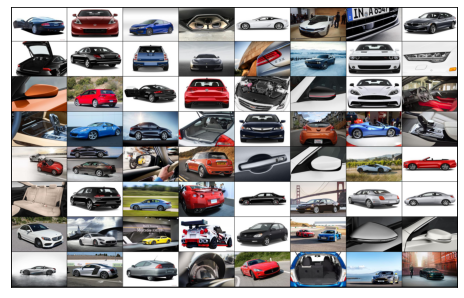

In [16]:
def denorm(img_tensors):
    return img_tensors * stats[1][0] + stats[0][0]

def show_images(images, nmax=64):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid(denorm(images.detach()[:nmax]), nrow=8).permute(1, 2, 0))

def show_batch(dl, nmax=64):
    for images, _ in dl:
        show_images(images, nmax)
        break

show_batch(train_dl)

In [17]:
## klasa generatora - póki co idea skopiowana z linku 3)
# nn.Module - base class for all neural network modules
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()

        # TODO: okreslic wlasciwe parametry w funkcji ponizej
        self.label_emb = nn.Embedding(number_of_classes, number_of_classes)

        # TODO: wypróbować Conv2d ale i sprawdzić jak zachowuje sie sieć przy nn.Linear

        def block(in_feat, out_feat, normalize=True):
                # layers = [nn.Linear(in_feat, out_feat)]
                layers = [nn.Linear(in_feat, out_feat)]
                if normalize:
                    layers.append(nn.BatchNorm1d(out_feat, 0.8))
                layers.append(nn.LeakyReLU(0.2, inplace=True))
                return layers

        self.model = nn.Sequential(
            *block(latent_size + number_of_classes, 128, normalize=False),
            *block(128, 256),
            *block(256, 512),
            *block(512, 1024),
            nn.Linear(1024, int(np.prod(img_shape))),
            nn.Tanh()
        )

    def forward(self, noise, labels):
        # Concatenate label embedding and image to produce input
        gen_input = torch.cat((self.label_emb(labels), noise), -1)
        img = self.model(gen_input)
        img = img.view(img.size(0), *img_shape)
        return img

In [18]:
## klasa dyskryminatora - póki co idea skopiowana z linku 3)
class Discriminator(nn.Module):
    def __init__(self):
            super(Discriminator, self).__init__()

            self.label_embedding = nn.Embedding(number_of_classes, number_of_classes)

            # self.model = nn.Sequential(
            #     # in: 3 x 64 x 64
            #     nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1, bias=False),
            #     nn.BatchNorm2d(64),
            #     nn.LeakyReLU(0.2, inplace=True),
            #     # out: 64 x 32 x 32

            #     nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1, bias=False),
            #     nn.BatchNorm2d(128),
            #     nn.LeakyReLU(0.2, inplace=True),
            #     # out: 128 x 16 x 16

            #     nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1, bias=False),
            #     nn.BatchNorm2d(256),
            #     nn.LeakyReLU(0.2, inplace=True),
            #     # out: 256 x 8 x 8

            #     nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=1, bias=False),
            #     nn.BatchNorm2d(512),
            #     nn.LeakyReLU(0.2, inplace=True),
            #     # out: 512 x 4 x 4

            #     nn.Conv2d(512, 1, kernel_size=4, stride=1, padding=0, bias=False),
            #     # out: 1 x 1 x 1

            #     nn.Flatten(),
            #     nn.Sigmoid()
            # )

            self.model = nn.Sequential(
                nn.Linear(number_of_classes+ int(np.prod(img_shape)), 512),
                nn.LeakyReLU(0.2, inplace=True),
                nn.Linear(512, 512),
                nn.Dropout(0.4),
                nn.LeakyReLU(0.2, inplace=True),
                nn.Linear(512, 512),
                nn.Dropout(0.4),
                nn.LeakyReLU(0.2, inplace=True),
                nn.Linear(512, 1),
                nn.Sigmoid()
            )

    def forward(self, img, labels):
        # Concatenate label embedding and image to produce input
        d_in = torch.cat((img.view(img.size(0), -1), self.label_embedding(labels)), -1)
        validity = self.model(d_in)
        return validity

In [19]:
fun_loss = nn.BCELoss() # -> binary cross entropy

# Initialize generator and discriminator
generator = Generator()
discriminator = Discriminator()
b1=0.5
b2=0.999
# lrate=0.0002
lrate=0.002
optimizer_D = optim.Adam(discriminator.parameters(), lr=lrate, betas=(b1, b2))
optimizer_G = optim.Adam(generator.parameters(), lr=lrate, betas=(b1, b2))

In [20]:
def sample_image(n_row, batches_done):
    """Saves a grid of generated digits ranging from 0 to n_classes"""
    # Sample noise
    z = Variable(FloatTensor(np.random.normal(0, 1, (n_row ** 2, latent_size))))
    # Get labels ranging from 0 to n_classes for n rows
    labels = np.array([num for _ in range(n_row) for num in range(n_row)])
    labels = Variable(LongTensor(labels))
    gen_imgs = generator(z, labels)
    save_image(gen_imgs.data, "./examples/%d.png" % batches_done, nrow=n_row, normalize=True)

In [21]:
# ----------
#  Training
# ----------

for epoch in range(number_of_epochs):
    for i, (imgs, labels) in enumerate(train_dl):

        batch_size = imgs.shape[0]

        # Adversarial ground truths
        valid = Variable(FloatTensor(batch_size, 1).fill_(1.0), requires_grad=False)
        fake = Variable(FloatTensor(batch_size, 1).fill_(0.0), requires_grad=False)

        # Configure input
        real_imgs = Variable(imgs.type(FloatTensor))
        labels = Variable(labels.type(LongTensor))

        # -----------------
        #  Train Generator
        # -----------------

        optimizer_G.zero_grad()

        # Sample noise and labels as generator input
        z = Variable(FloatTensor(np.random.normal(0, 1, (batch_size, latent_size))))
        gen_labels = Variable(LongTensor(np.random.randint(0, number_of_classes, batch_size)))

        # Generate a batch of images
        gen_imgs = generator(z, gen_labels)

        # Loss measures generator's ability to fool the discriminator
        validity = discriminator(gen_imgs, gen_labels)
        g_loss = fun_loss(validity, valid)

        g_loss.backward()
        optimizer_G.step()

        # ---------------------
        #  Train Discriminator
        # ---------------------

        optimizer_D.zero_grad()

        # Loss for real images
        validity_real = discriminator(real_imgs, labels)
        d_real_loss = fun_loss(validity_real, valid)

        # Loss for fake images
        validity_fake = discriminator(gen_imgs.detach(), gen_labels)
        d_fake_loss = fun_loss(validity_fake, fake)

        # Total discriminator loss
        d_loss = (d_real_loss + d_fake_loss) / 2

        d_loss.backward()
        optimizer_D.step()

        print(
            "[Epoch %d/%d] [Batch %d/%d] [D loss: %f] [G loss: %f]"
            % (epoch + 1, number_of_epochs, i + 1, len(train_dl), d_loss.item(), g_loss.item())
        )

        batches_done = epoch * len(train_dl) + i
        if batches_done % 5 == 0:
            sample_image(n_row=5, batches_done=batches_done)


[Epoch 1/5] [Batch 1/79] [D loss: 0.695518] [G loss: 0.683897]
[Epoch 1/5] [Batch 2/79] [D loss: 0.448099] [G loss: 0.521659]
[Epoch 1/5] [Batch 3/79] [D loss: 23.758841] [G loss: 0.000019]
[Epoch 1/5] [Batch 4/79] [D loss: 29.387922] [G loss: 22.724852]
[Epoch 1/5] [Batch 5/79] [D loss: 3.801180] [G loss: 10.434793]
[Epoch 1/5] [Batch 6/79] [D loss: 1.330377] [G loss: 5.052974]
[Epoch 1/5] [Batch 7/79] [D loss: 23.522093] [G loss: 1.459853]
[Epoch 1/5] [Batch 8/79] [D loss: 30.161612] [G loss: 0.403313]
[Epoch 1/5] [Batch 9/79] [D loss: 25.544378] [G loss: 1.728074]


KeyboardInterrupt: ignored

In [ ]:
# Save trained model (optional)
torch.save(generator.state_dict(), './trained_models/generator.pt')

In [ ]:
# Load previously trained model (optional)
generator = Generator()
generator.load_state_dict(torch.load('./trained_models/generator.pt'))
generator.eval()

In [ ]:
# Generate & save an example of every class
classes = torch.LongTensor(range(len(car_types)))
noise = Variable(FloatTensor(np.random.normal(0, 1, (len(car_types), latent_size))))
gen_imgs = generator(noise, classes)
save_image(gen_imgs.data, "./examples/final.png", normalize=True)